In [1]:
# Thư viện cơ bản
import pandas as pd
import numpy as np

# Vẽ biểu đồ thô ban đầu
import matplotlib.pyplot as plt
import seaborn as sns

# Thư viện kiểm tra thống kê
from scipy import stats

In [2]:
# Đọc dữ liệu
df = pd.read_csv('Data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Xem tổng quan
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Target variable
target_col = 'Attrition'

# Numerical variables
numerical_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
    'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
    'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
    'YearsWithCurrManager'
]

# Categorical variables
categorical_cols = [
    'BusinessTravel', 'Department', 'EducationField', 
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]

# Ordinal variables
ordinal_cols = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
    'JobLevel', 'JobSatisfaction', 'PerformanceRating', 
    'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'
]

# Columns to drop
drop_cols = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']


In [4]:
# Chuẩn hóa datatype
for col in categorical_cols + [target_col]:
    df[col] = df[col].astype('category')

print("✅ Đã chuẩn hóa datatype cho các biến phân loại.")

✅ Đã chuẩn hóa datatype cho các biến phân loại.


In [5]:
#Phân nhóm
# Nhóm tuổi
df['AgeBand'] = pd.cut(
    df['Age'], 
    bins=[17, 25, 30, 35, 40, 60], 
    labels=['18-25', '26-30', '31-35', '36-40', '41+']
)

df['AgeBand'] = df['AgeBand'].astype('category')

print("✅ Đã sinh biến AgeBand.")

# Nhóm thâm niên làm việc
df['TenureBand'] = pd.cut(
    df['YearsAtCompany'],
    bins=[-1, 1, 3, 5, 10, 40],
    labels=['<1y', '1-3y', '3-5y', '5-10y', '>10y']
)

df['TenureBand'] = df['TenureBand'].astype('category')

print("✅ Đã sinh biến TenureBand.")


# Nhóm mức thu nhập
df['IncomeBand'] = pd.cut(
    df['MonthlyIncome'],
    bins=[0, 3000, 5000, 8000, 12000, 20000],
    labels=['Low', 'Lower-Mid', 'Mid', 'Upper-Mid', 'High']
)

df['IncomeBand'] = df['IncomeBand'].astype('category')

print("✅ Đã sinh biến IncomeBand.")



✅ Đã sinh biến AgeBand.
✅ Đã sinh biến TenureBand.
✅ Đã sinh biến IncomeBand.


### 🔹 **Bước 2: Tổng quan về Attrition**

C:\Users\maiho\AppData\Local\Temp\ipykernel_2764\2144236731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


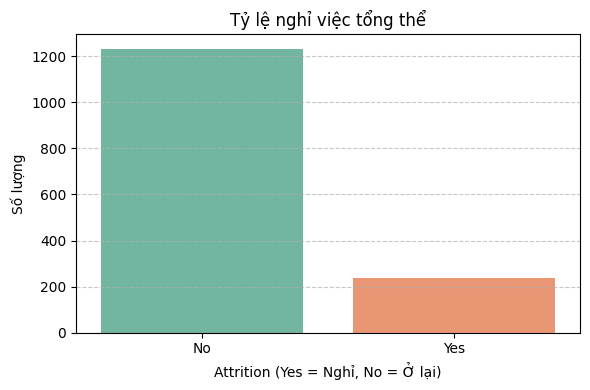

Số lượng nghỉ việc:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Tỷ lệ phần trăm:
Attrition
No     83.88
Yes    16.12
Name: proportion, dtype: float64


In [6]:
# 📊 Tỷ lệ nghỉ việc tổng thể
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title('Tỷ lệ nghỉ việc tổng thể')
plt.xlabel('Attrition (Yes = Nghỉ, No = Ở lại)')
plt.ylabel('Số lượng')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('attrition_overall.png', dpi=300)
plt.show()

# 📈 In thêm thông tin số lượng và % để viết insight
counts = df['Attrition'].value_counts()
percent = df['Attrition'].value_counts(normalize=True) * 100
print("Số lượng nghỉ việc:")
print(counts)
print("\nTỷ lệ phần trăm:")
print(percent.round(2))


- Tổng tỷ lệ nghỉ việc là **16.12%** – tức khoảng **1 trong 6 nhân viên đã rời công ty**.
- Mức này đủ lớn để trở thành một vấn đề cần theo dõi sát.
- Phân tích tiếp theo sẽ giúp xác định cụ thể nhóm công việc, độ tuổi hoặc yếu tố liên quan đến nghỉ việc cao.


### 🔹 **Bước 3: Attrition theo từng nhóm đặc trưng**

#### 📊 3.1. Attrition theo `JobRole`

* Mục tiêu: Nhóm công việc nào có tỷ lệ nghỉ việc cao?
* Biểu đồ: Bar chart nhóm theo `Attrition`

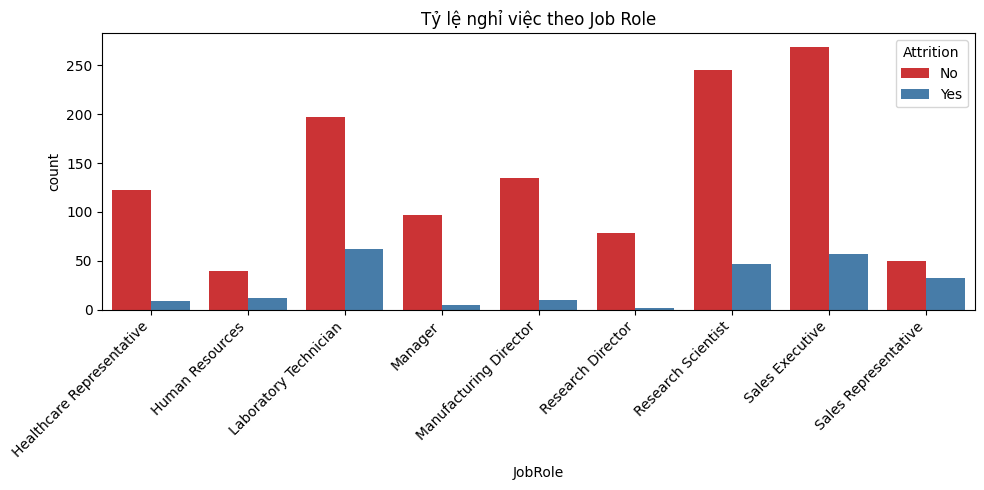

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='JobRole', hue='Attrition', palette='Set1')
plt.title('Tỷ lệ nghỉ việc theo Job Role')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('attrition_by_jobrole.png', dpi=300)
plt.show()

- **Sales Representative** là nhóm có nguy cơ nghỉ việc cao nhất trong toàn công ty.
- Nhóm **Laboratory Technician** và **Research Scientist** cũng ghi nhận số nghỉ việc đáng kể, cần xem xét thêm về mức độ hài lòng và khối lượng công việc.
- Các vai trò cấp quản lý như **Manager**, **Director** gần như không có nhân viên nghỉ việc, cho thấy sự ổn định và gắn bó cao.


#### 📊 3.2. Attrition theo `Department`

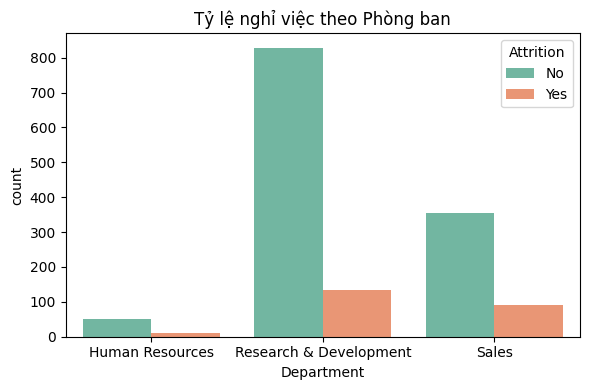

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Department', hue='Attrition', palette='Set2')
plt.title('Tỷ lệ nghỉ việc theo Phòng ban')
plt.tight_layout()
plt.savefig('attrition_by_department.png', dpi=300)
plt.show()

- Phòng **Research & Development** có số lượng nghỉ việc lớn nhất, nhưng cần phân tích thêm theo tỷ lệ % vì đây là phòng có quy mô lớn.
- Phòng **Sales** ghi nhận tỷ lệ nghỉ việc khá cao, có thể liên quan đến vai trò Sales Representative đã phân tích ở biểu đồ trước.
- **Human Resources** gần như không có ai nghỉ việc, cho thấy sự gắn bó nội bộ và khả năng quản lý nhân sự tốt.


#### 📊 3.3. Attrition theo `OverTime`

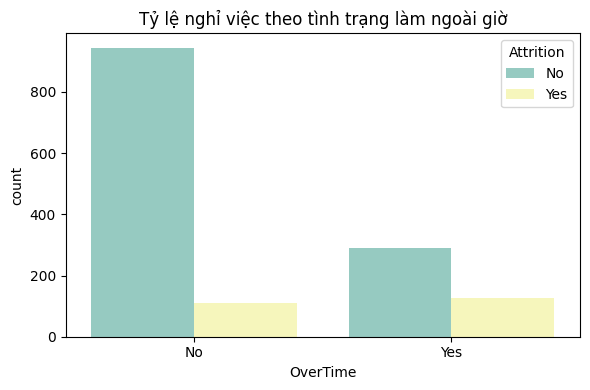

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='Set3')
plt.title('Tỷ lệ nghỉ việc theo tình trạng làm ngoài giờ')
plt.tight_layout()
plt.savefig('attrition_by_overtime.png', dpi=300)
plt.show()

- Nhân viên làm **OverTime có tỷ lệ nghỉ việc cao gần gấp 3 lần** so với nhóm không OverTime.
- Đây là một yếu tố mang tính cảnh báo sớm về **rủi ro kiệt sức** và mất cân bằng công việc – cuộc sống.
- Có thể cân nhắc điều chỉnh chính sách làm thêm giờ hoặc cung cấp chế độ đãi ngộ tốt hơn cho nhóm này.


#### 📊 3.4. Attrition theo `AgeBand`

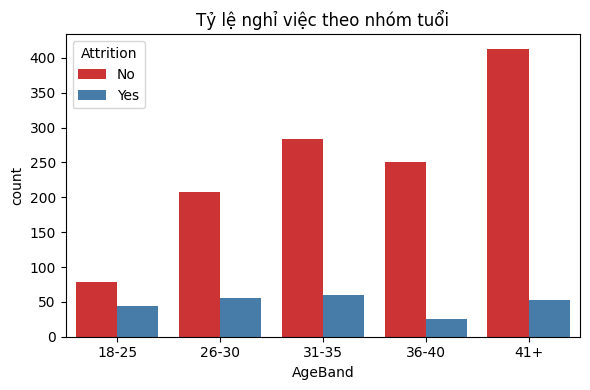

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='AgeBand', hue='Attrition', palette='Set1')
plt.title('Tỷ lệ nghỉ việc theo nhóm tuổi')
plt.tight_layout()
plt.savefig('attrition_by_ageband.png', dpi=300)
plt.show()

- Nhân viên trong độ tuổi **26–35** có nguy cơ nghỉ việc cao nhất – đây là giai đoạn nhiều người tìm kiếm cơ hội phát triển mới.
- Nhóm **36–40 tuổi** là ổn định nhất với tỷ lệ nghỉ việc thấp, có thể xem là nhân sự cốt lõi trung niên.
- Nhóm **trên 41 tuổi** có số lượng đông nhưng ít nghỉ việc, cho thấy tính ổn định cao trong giai đoạn cuối sự nghiệp.


#### 📊 3.5. Attrition theo `TenureBand`

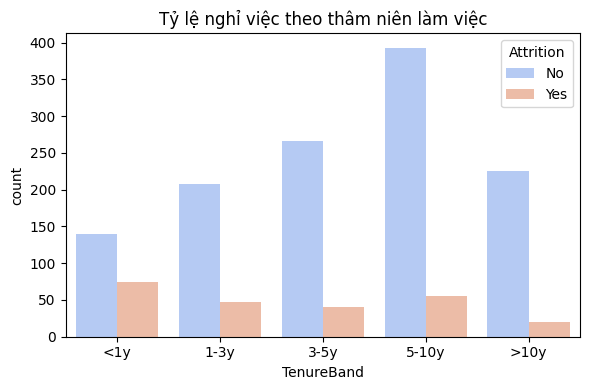

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='TenureBand', hue='Attrition', palette='coolwarm')
plt.title('Tỷ lệ nghỉ việc theo thâm niên làm việc')
plt.tight_layout()
plt.savefig('attrition_by_tenureband.png', dpi=300)
plt.show()

- Nhân viên có thâm niên **<1 năm và 1–3 năm** là hai nhóm có tỷ lệ nghỉ việc cao nhất – cho thấy thách thức trong việc giữ chân nhân sự mới.
- Tỷ lệ nghỉ việc giảm dần theo thời gian làm việc – phản ánh sự ổn định nếu nhân viên vượt qua được giai đoạn đầu.
- Nhóm **>10 năm** gần như không nghỉ việc – là nhóm có mức độ trung thành cao, cần được giữ lại như tài sản cốt lõi.


#### 📊 3.6. Job Satisfaction & Environment Satisfaction

C:\Users\maiho\AppData\Local\Temp\ipykernel_2764\2549589474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Attrition', y='JobSatisfaction', palette='pastel')


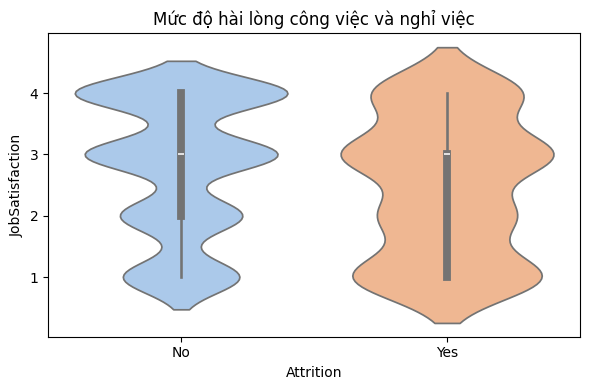

C:\Users\maiho\AppData\Local\Temp\ipykernel_2764\2549589474.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Attrition', y='EnvironmentSatisfaction', palette='muted')


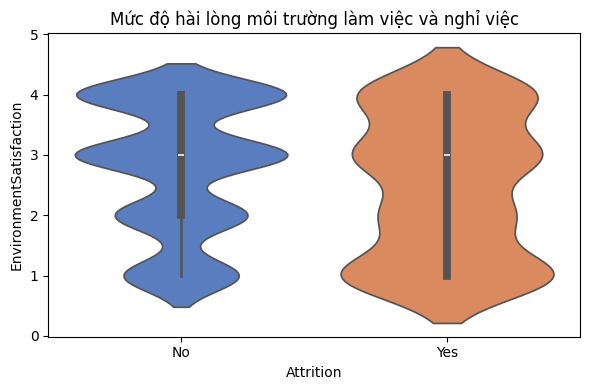

In [12]:
# Job Satisfaction
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x='Attrition', y='JobSatisfaction', palette='pastel')
plt.title('Mức độ hài lòng công việc và nghỉ việc')
plt.tight_layout()
plt.savefig('jobsat_vs_attrition.png', dpi=300)
plt.show()

# Environment Satisfaction
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x='Attrition', y='EnvironmentSatisfaction', palette='muted')
plt.title('Mức độ hài lòng môi trường làm việc và nghỉ việc')
plt.tight_layout()
plt.savefig('envsat_vs_attrition.png', dpi=300)
plt.show()

- Nhóm nghỉ việc có xu hướng **hài lòng công việc và môi trường ở mức thấp hơn** rõ rệt so với nhóm ở lại.
- Mức độ **JobSatisfaction** và **EnvironmentSatisfaction** có thể là chỉ số cảnh báo sớm giúp HR phát hiện nguy cơ nghỉ việc.
- Cần chú trọng cải thiện trải nghiệm nhân viên cả về nội dung công việc lẫn môi trường văn hóa tại nơi làm việc.


### 🔹 **Bước 4: Heatmap tương quan**

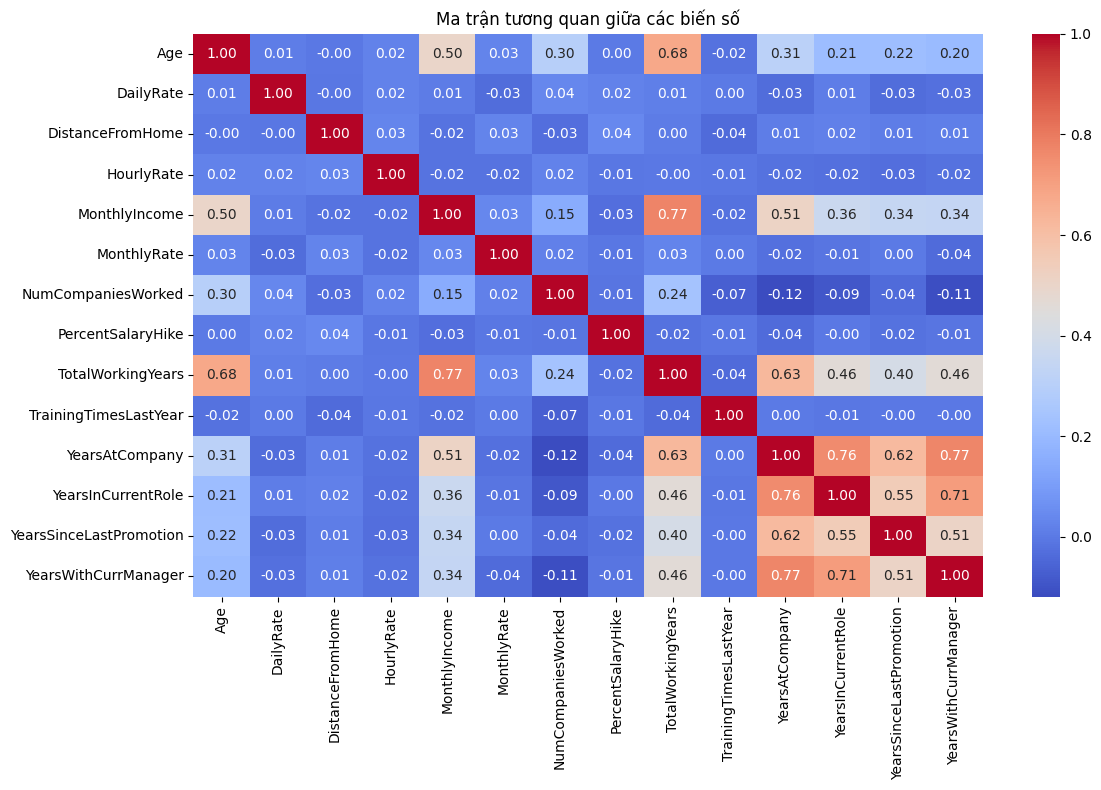

In [13]:
# Chỉ lấy các biến số
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Ma trận tương quan giữa các biến số')
plt.tight_layout()
plt.savefig('heatmap_correlation.png', dpi=300)
plt.show()

- Thu nhập hàng tháng (`MonthlyIncome`) tăng theo **thâm niên làm việc** (`TotalWorkingYears`) – với tương quan mạnh r = 0.77.
- Các biến thể hiện **mức độ gắn bó với tổ chức** như `YearsAtCompany`, `YearsInCurrentRole`, `YearsWithCurrManager` có tương quan cao với nhau – cho thấy sự phát triển theo chiều dọc nội bộ.
- `PercentSalaryHike` và `TrainingTimesLastYear` không có tương quan đáng kể với các biến khác – có thể do phân bổ không đồng đều hoặc mang tính ngẫu nhiên.
- `DistanceFromHome` và `HourlyRate` gần như không liên quan đến bất kỳ biến nào – nên cân nhắc kỹ trước khi dùng vào mô hình dự đoán.


### 🔹 **Bước 5: Biểu đồ chuỗi hành trình nghỉ việc – từ vai trò đến Attrition**

#### 🎯 **Mục tiêu:**

Trực quan hóa quá trình **nhân viên đi làm và rời đi**, bằng cách phân tích mối liên hệ giữa các đặc trưng như **JobRole**, **OverTime**, và **Attrition**.

C:\Users\maiho\AppData\Local\Temp\ipykernel_2764\3850397724.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_df = df.groupby(['JobRole', 'OverTime', 'Attrition']).size().unstack().fillna(0)


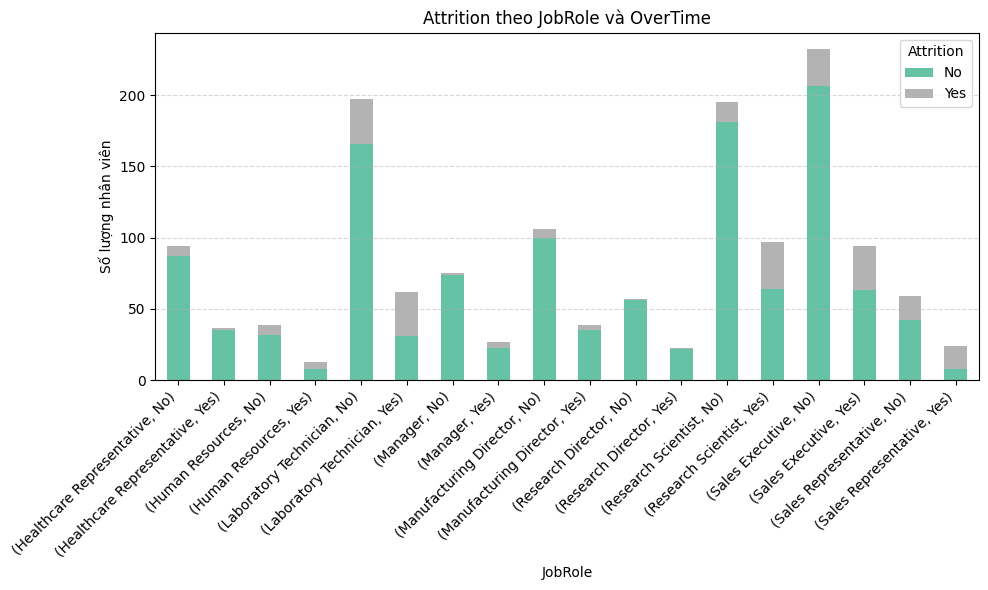

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nhóm dữ liệu: JobRole + OverTime + Attrition
pivot_df = df.groupby(['JobRole', 'OverTime', 'Attrition']).size().unstack().fillna(0)

# Vẽ stacked bar chart theo Attrition (Yes/No)
pivot_df.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')

plt.title('Attrition theo JobRole và OverTime')
plt.xlabel('JobRole')
plt.ylabel('Số lượng nhân viên')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig('stacked_attrition_jobrole_overtime.png', dpi=300)
plt.show()


- Ở **mọi vai trò**, nhóm có làm OverTime đều có tỷ lệ nghỉ việc cao hơn nhóm không làm OverTime.
- Đặc biệt, **Sales Representative và Research Scientist** là những vai trò bị ảnh hưởng nhiều nhất khi làm thêm giờ → dễ dẫn đến nghỉ việc.
- Điều này cho thấy OverTime là một **yếu tố gây kiệt sức (burnout)**, nhất là trong các vai trò nhiều áp lực.
- Chính sách giảm OverTime hoặc đền bù xứng đáng nên được ưu tiên ở các nhóm vai trò này.
